# Report pull from Big Commerce

We need someone with the knowledge and skill to pull specific KPI data from a Big Commerce storefront for the below KPIs and present us with a clean document deliverable of said KPIs.

- AOV Pre September 15 2023 (all available data)
- AOV Pre March 2023 (all available data)
- AOV Post September 15 2023 (September 15 2023-current)
- ACLV Pre September 15 2023 (ACLV up to September 15 2023)
- ACLV total
- How many active customers?
- How many orders / month average past 12 months

In [1]:
import pandas as pd   # For working with dataframes 

In [2]:
data = pd.read_excel("Data/E_commerce.xlsx")

In [3]:
data.head()

,Customer ID,Customer Name,Order Date,Segment,Postal Code,City,State,Country,Market,Product ID,Category,Sub-Category,Product Name,Unit Price,Quantity,Total Purchase,Discount,Profit
0,BT-113057,Beth Thompson,2024-02-19,Home Office,NaN,Perth,Western Australia,Australia,Asia Pacific,OFF-ST-6047,Office Supplies,Storage,"Smead Lockers, Industrial",179.01000,5,895.05000,0.100,39.75000
1,TW-2102527,Tamara Willingham,2024-02-18,Home Office,NaN,Chengdu,Sichuan,China,Asia Pacific,OFF-AP-4730,Office Supplies,Appliances,"Hoover Microwave, Black",308.07000,3,924.21000,0.000,397.35000
2,AM-107051408,Anne McFarland,2024-02-17,Consumer,24153.0,Salem,Virginia,United States,USCA,FUR-BO-3651,Furniture,Bookcases,"Bush Westfield Collection Bookcases, Fully Ass...",100.98000,3,302.94000,0.000,69.67620
3,BT-1305108,Beth Thompson,2024-02-16,Home Office,NaN,Severodvinsk,Arkhangel'sk,Russia,Europe,TEC-AC-4187,Technology,Accessories,"Enermax Router, Programmable",259.83000,1,259.83000,0.000,106.53000
4,LR-1691539,Lena Radford,2024-02-15,Consumer,NaN,San Salvador,San Salvador,El Salvador,LATAM,TEC-CO-4776,Technology,Copiers,"HP Fax Machine, Laser",199.56008,7,1396.92056,0.002,459.06056


In [4]:
# Convert order date to datetime
from datetime import datetime
data['Order Date'] = pd.to_datetime(data['Order Date'])

In [5]:
# Filter orders for pre/post Sept 15, 2023
pre_sept15 = data[data['Order Date'] < '2023-09-15']
post_sept15 = data[data['Order Date'] >= '2023-09-15']

# Filter orders for orders pre March 2023
pre_march2023 = data[data['Order Date'] < '2023-03-01']

# Filter orders from past 12 months
past_year = data[data['Order Date'] > '2023-02-20']

In [6]:
# AOV pre Sept 15, 2023
pre_sept15_aov = pre_sept15['Total Purchase'].sum() / len(pre_sept15)
print(f"AOV Pre September 15 2023 = {pre_sept15_aov}")

AOV Pre September 15 2023 = 1241.0599669831442


In [7]:
# AOV post Sept 15, 2023  
post_sept15_aov = post_sept15['Total Purchase'].sum() / len(post_sept15)
print(f"AOV Post September 15 2023 = {post_sept15_aov}")

AOV Post September 15 2023 = 787.5700354430379


In [8]:
# AOV pre March 2023 
pre_march2023_aov = pre_march2023['Total Purchase'].sum() / len(pre_march2023)
print(f"AOV Pre March 2023 = {pre_march2023_aov}")

AOV Pre March 2023 = 1274.2738357327428


In [9]:
# ACLV pre Sept 15, 2023
unique_cust_pre = len(pre_sept15['Customer ID'].unique())
pre_sept15_aclv = pre_sept15['Total Purchase'].sum() / unique_cust_pre
print(f" ACLV Pre September 15 2023 = {pre_sept15_aclv}")

 ACLV Pre September 15 2023 = 1630.995173607595


In [10]:
# ACLV Total 
unique_cust_total = len(data['Customer ID'].unique())
total_aclv = data['Total Purchase'].sum() / unique_cust_total
print(f"ACLV total = {total_aclv}")

ACLV total = 1604.5560574462597


In [11]:
# Active customers
from datetime import timedelta

# Set cutoff date for 90 days ago
cutoff_date = datetime.today() - timedelta(days=90)

# Filter for orders in past 90 days
data_90d = data[data['Order Date'] > cutoff_date]

# Get unique customers 
unique_cust_90d = data_90d['Customer ID'].unique()

# Count unique customers
active_cust_90d = len(unique_cust_90d) 
print(f"Active customers = {active_cust_90d}")

Active customers = 67


In [12]:
# Calculate monthly orders  
monthly_orders = past_year.resample('M', on='Order Date').size()

# Get mean for average monthly orders
avg_monthly_orders = monthly_orders.mean()

print(f"Orders/month average past 12 months = {avg_monthly_orders}")

Orders/month average past 12 months = 28.0


In [13]:
kpi_data = pd.DataFrame({'KPI': ['AOV Pre Sep 15 2023', 
                                 'AOV Pre Mar 2023', 
                                 'AOV Post Sep 15 2023',
                                 'ACLV Pre Sep 15 2023', 
                                 'ACLV Total', 'Active Customers', 
                                 'Orders/Month Avg'], 
                         'Value': [pre_sept15_aov, 
                                   pre_march2023_aov, 
                                   post_sept15_aov, 
                                   pre_sept15_aclv, total_aclv, 
                                   active_cust_90d, 
                                   avg_monthly_orders]})

In [14]:
kpi_data

,KPI,Value
0,AOV Pre Sep 15 2023,1241.059967
1,AOV Pre Mar 2023,1274.273836
2,AOV Post Sep 15 2023,787.570035
3,ACLV Pre Sep 15 2023,1630.995174
4,ACLV Total,1604.556057
5,Active Customers,67.000000
6,Orders/Month Avg,28.000000


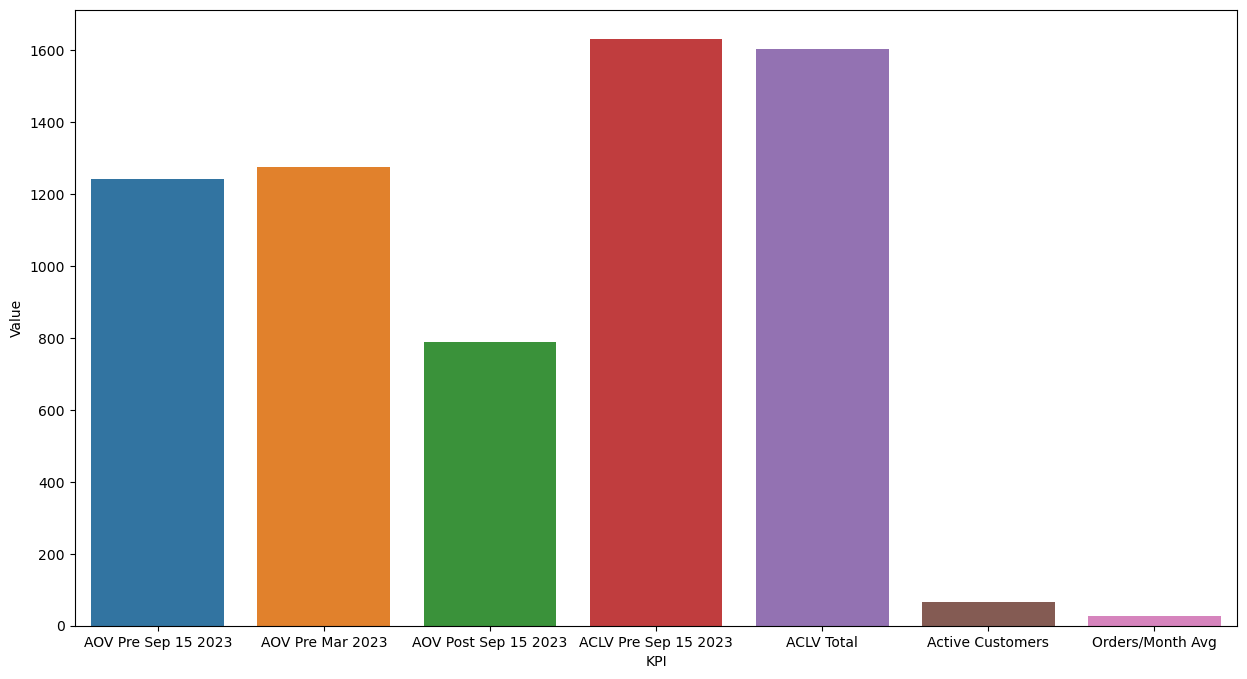

In [15]:
# for plotting graphs
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize = (15,8))
sns.barplot(x = kpi_data['KPI'], y = kpi_data['Value'])
plt.show()